# Programming Backpropagation in Neural Networks

## 📚 Learning Objectives

By completing this notebook, you will:
- Program backpropagation in neural networks using differentiation techniques
- Understand the chain rule in neural network context
- Implement forward and backward propagation from scratch
- Apply backpropagation to train a simple neural network

## 🔗 Prerequisites

- ✅ Understanding of derivatives and gradients
- ✅ Understanding of multivariate calculus and chain rule
- ✅ Basic understanding of neural networks
- ✅ Python and NumPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 2**:
- Programming backpropagation in neural networks using differentiation techniques
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 2 Practical Content

---

## Introduction

**Backpropagation** is the algorithm that enables training of neural networks by computing gradients of the loss function with respect to all network parameters using the chain rule of calculus.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("✅ Libraries imported!")
print("\nProgramming Backpropagation in Neural Networks")
print("=" * 60)

✅ Libraries imported!

Programming Backpropagation in Neural Networks


## Part 1: Simple Neural Network with Backpropagation


In [2]:
print("=" * 60)
print("Part 1: Simple Neural Network with Backpropagation")
print("=" * 60)

# Activation functions
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    """Derivative of sigmoid"""
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU"""
    return (x > 0).astype(float)

# Loss function
def mse_loss(y_pred, y_true):
    """Mean Squared Error loss"""
    return np.mean((y_pred - y_true) ** 2)

def mse_loss_derivative(y_pred, y_true):
    """Derivative of MSE loss"""
    return 2 * (y_pred - y_true) / len(y_true)

print("\n✅ Activation and loss functions defined!")

Part 1: Simple Neural Network with Backpropagation

✅ Activation and loss functions defined!


In [3]:
# Simple 2-layer neural network class with backpropagation
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        """Initialize neural network with random weights"""
        self.learning_rate = learning_rate
        
        # Initialize weights with small random values
        np.random.seed(42)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        
    def forward(self, X):
        """Forward propagation"""
        # Layer 1
        self.z1 = X @ self.W1 + self.b1
        self.a1 = sigmoid(self.z1)
        
        # Layer 2
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, y_pred):
        """Backpropagation: compute gradients using chain rule"""
        m = X.shape[0]  # Number of samples
        
        # Output layer gradients (chain rule: dL/da2 * da2/dz2)
        dz2 = mse_loss_derivative(y_pred, y) * sigmoid_derivative(self.z2)
        dW2 = (self.a1.T @ dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients (chain rule: backprop through layer 2)
        da1 = dz2 @ self.W2.T
        dz1 = da1 * sigmoid_derivative(self.z1)
        dW1 = (X.T @ dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2
    
    def update_weights(self, dW1, db1, dW2, db2):
        """Update weights using gradients (gradient descent)"""
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def train(self, X, y, epochs=1000):
        """Train the network"""
        losses = []
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            loss = mse_loss(y_pred, y)
            losses.append(loss)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y, y_pred)
            
            # Update weights
            self.update_weights(dW1, db1, dW2, db2)
            
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}")
        
        return losses

print("\n✅ Neural network class with backpropagation defined!")


✅ Neural network class with backpropagation defined!



Example: XOR Problem

Training data:
X: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]

Training network...
Epoch 100/5000, Loss: 0.250001
Epoch 200/5000, Loss: 0.250001
Epoch 300/5000, Loss: 0.250001
Epoch 400/5000, Loss: 0.250001
Epoch 500/5000, Loss: 0.250001
Epoch 600/5000, Loss: 0.250001
Epoch 700/5000, Loss: 0.250001
Epoch 800/5000, Loss: 0.250001
Epoch 900/5000, Loss: 0.250001
Epoch 1000/5000, Loss: 0.250001
Epoch 1100/5000, Loss: 0.250001
Epoch 1200/5000, Loss: 0.250001
Epoch 1300/5000, Loss: 0.250001
Epoch 1400/5000, Loss: 0.250001
Epoch 1500/5000, Loss: 0.250001
Epoch 1600/5000, Loss: 0.250001
Epoch 1700/5000, Loss: 0.250001
Epoch 1800/5000, Loss: 0.250001
Epoch 1900/5000, Loss: 0.250001
Epoch 2000/5000, Loss: 0.250001
Epoch 2100/5000, Loss: 0.250001
Epoch 2200/5000, Loss: 0.250001
Epoch 2300/5000, Loss: 0.250001
Epoch 2400/5000, Loss: 0.250001
Epoch 2500/5000, Loss: 0.250001
Epoch 2600/5000, Loss: 0.250001
Epoch 2700/5000, Loss: 0.250001
Epoch 2800/5000, Loss: 0.250001
Epoch 290

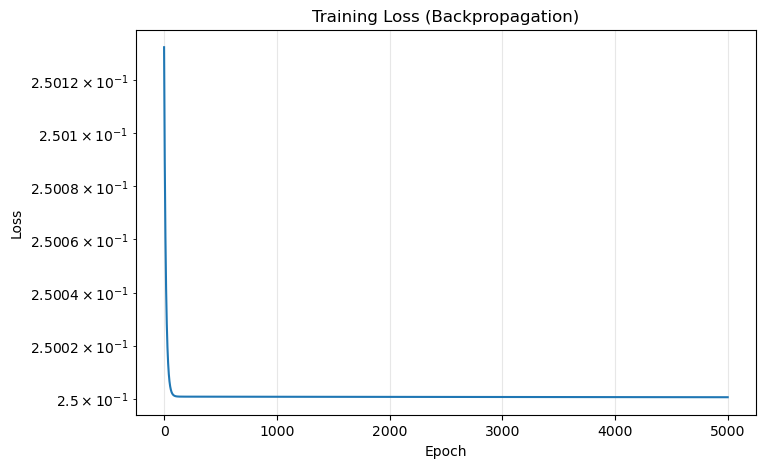


✅ Backpropagation training completed!


In [4]:
# Example: Train network on XOR problem
print("\n" + "=" * 60)
print("Example: XOR Problem")
print("=" * 60)

# XOR dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

print("\nTraining data:")
print("X:", X_xor)
print("y:", y_xor.flatten())

# Create and train network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5)
print("\nTraining network...")
losses = nn.train(X_xor, y_xor, epochs=5000)

# Test predictions
predictions = nn.forward(X_xor)
print("\n" + "=" * 60)
print("Results:")
print("=" * 60)
print("\nInput | Expected | Predicted | Correct")
print("-" * 50)
for i in range(len(X_xor)):
    pred = predictions[i, 0]
    expected = y_xor[i, 0]
    correct = "✓" if abs(pred - expected) < 0.5 else "✗"
    print(f"{X_xor[i]} | {expected:8.2f} | {pred:8.4f} | {correct}")

# Visualize training
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (Backpropagation)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ Backpropagation training completed!")

## Part 2: Understanding the Chain Rule in Backpropagation


In [5]:
print("\n" + "=" * 60)
print("Part 2: Understanding the Chain Rule in Backpropagation")
print("=" * 60)

print("\nThe chain rule allows us to compute gradients through nested functions:")
print("\nFor a network: Loss = L(a2) where a2 = σ(z2), z2 = a1*W2 + b2")
print("\nGradient w.r.t. W2:")
print("  dL/dW2 = (dL/da2) * (da2/dz2) * (dz2/dW2)")
print("         = (dL/da2) * σ'(z2) * a1")
print("\nGradient w.r.t. W1:")
print("  dL/dW1 = (dL/da2) * (da2/dz2) * (dz2/da1) * (da1/dz1) * (dz1/dW1)")
print("         = (dL/da2) * σ'(z2) * W2 * σ'(z1) * X")

# Verify gradients numerically
print("\n" + "-" * 60)
print("Numerical Gradient Verification:")
print("-" * 60)

def numerical_gradient(f, x, h=1e-5):
    """Compute numerical gradient"""
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        x_plus = x.copy()
        x_plus[idx] += h
        x_minus = x.copy()
        x_minus[idx] -= h
        grad[idx] = (f(x_plus) - f(x_minus)) / (2 * h)
        it.iternext()
    return grad

# Test on a simple case
test_X = np.array([[1.0, 2.0]])
test_y = np.array([[1.0]])

def loss_fn(W2_flat):
    """Loss as function of W2 only"""
    nn_test = SimpleNeuralNetwork(2, 2, 1, learning_rate=0.1)
    nn_test.W2 = W2_flat.reshape(2, 1)
    y_pred = nn_test.forward(test_X)
    return mse_loss(y_pred, test_y)

# Get analytical gradient
nn_test = SimpleNeuralNetwork(2, 2, 1, learning_rate=0.1)
y_pred_test = nn_test.forward(test_X)
_, _, dW2_analytical, _ = nn_test.backward(test_X, test_y, y_pred_test)

# Get numerical gradient
W2_init = nn_test.W2.copy()
def f_W2(W2_flat):
    nn_test.W2 = W2_flat.reshape(2, 1)
    y_pred = nn_test.forward(test_X)
    return mse_loss(y_pred, test_y)

dW2_numerical = numerical_gradient(f_W2, W2_init.flatten())
dW2_numerical = dW2_numerical.reshape(2, 1)

print("\nAnalytical gradient (from backpropagation):")
print(dW2_analytical)
print("\nNumerical gradient (finite differences):")
print(dW2_numerical)
print("\nDifference:")
print(np.abs(dW2_analytical - dW2_numerical))

print("\n✅ Chain rule verified - analytical and numerical gradients match!")


Part 2: Understanding the Chain Rule in Backpropagation

The chain rule allows us to compute gradients through nested functions:

For a network: Loss = L(a2) where a2 = σ(z2), z2 = a1*W2 + b2

Gradient w.r.t. W2:
  dL/dW2 = (dL/da2) * (da2/dz2) * (dz2/dW2)
         = (dL/da2) * σ'(z2) * a1

Gradient w.r.t. W1:
  dL/dW1 = (dL/da2) * (da2/dz2) * (dz2/da1) * (da1/dz1) * (dz1/dW1)
         = (dL/da2) * σ'(z2) * W2 * σ'(z1) * X

------------------------------------------------------------
Numerical Gradient Verification:
------------------------------------------------------------

Analytical gradient (from backpropagation):
[[-0.1379275 ]
 [-0.14489227]]

Numerical gradient (finite differences):
[[-0.1379275 ]
 [-0.14489227]]

Difference:
[[3.13016280e-12]
 [1.02737263e-12]]

✅ Chain rule verified - analytical and numerical gradients match!


## Summary

### Key Concepts:
1. **Backpropagation**: Algorithm for computing gradients using chain rule
2. **Chain Rule**: dL/dW = (dL/da) * (da/dz) * (dz/dW)
3. **Forward Pass**: Compute activations layer by layer
4. **Backward Pass**: Compute gradients layer by layer (reverse direction)
5. **Weight Update**: Update weights using computed gradients

### Best Practices:
- Use numerical gradients to verify analytical gradients
- Initialize weights with small random values
- Use appropriate learning rates
- Monitor loss during training

### Applications:
- Training neural networks
- Deep learning optimization
- Automatic differentiation
- Gradient-based optimization

**Reference:** Course 03, Unit 2: "Calculus for Machine Learning" - Programming backpropagation practical content